In [1]:
import os
import cv2
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# 경로 지정
print('현재 경로 : ',os.getcwd())

train_dir = './Train/'
val_dir = './Validation/'
test_dir = './Test/'


현재 경로 :  g:\00_Personal_project\001_AI__5_Flower_Types_Classification_Dataset\5_Flower_Types_Classification_Generator


In [3]:
# ImageDataGenerator 객체 생성
train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.4,
    zoom_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

val_data_gen = ImageDataGenerator(
    rescale = 1./255
)

test_data_gen = ImageDataGenerator(
    rescale = 1./255
)


In [4]:
# dir 순회하며 dir명에 맞게 라벨 생성하는 반복자 객체 생성
# 각각의 반복자 객체에는 dir의 이미지들이 랜덤순으로 들어감.
train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

val_gen = val_data_gen.flow_from_directory(
    val_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

test_gen = test_data_gen.flow_from_directory(
    test_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)



Found 3825 images belonging to 5 classes.
Found 675 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


(array([[[[0.33336645, 0.36049584, 0.23438519],
         [0.40991312, 0.4618315 , 0.3165371 ],
         [0.50309354, 0.57511765, 0.4160058 ],
         ...,
         [0.90196085, 0.9058824 , 0.8862746 ],
         [0.90196085, 0.9058824 , 0.8862746 ],
         [0.90196085, 0.9058824 , 0.8862746 ]],

        [[0.3512147 , 0.39334986, 0.25117308],
         [0.41684598, 0.48810738, 0.32209203],
         [0.5111746 , 0.59695965, 0.4422223 ],
         ...,
         [0.90196085, 0.9058824 , 0.8862746 ],
         [0.90196085, 0.9058824 , 0.8862746 ],
         [0.90196085, 0.9058824 , 0.8862746 ]],

        [[0.3794971 , 0.44149303, 0.27138236],
         [0.41888028, 0.5080003 , 0.32216904],
         [0.5161667 , 0.6126896 , 0.4336664 ],
         ...,
         [0.90196085, 0.9058824 , 0.8862746 ],
         [0.90196085, 0.9058824 , 0.8862746 ],
         [0.90196085, 0.9058824 , 0.8862746 ]],

        ...,

        [[0.93000203, 0.94339746, 0.9204582 ],
         [0.9359088 , 0.93860114, 0.9267194 

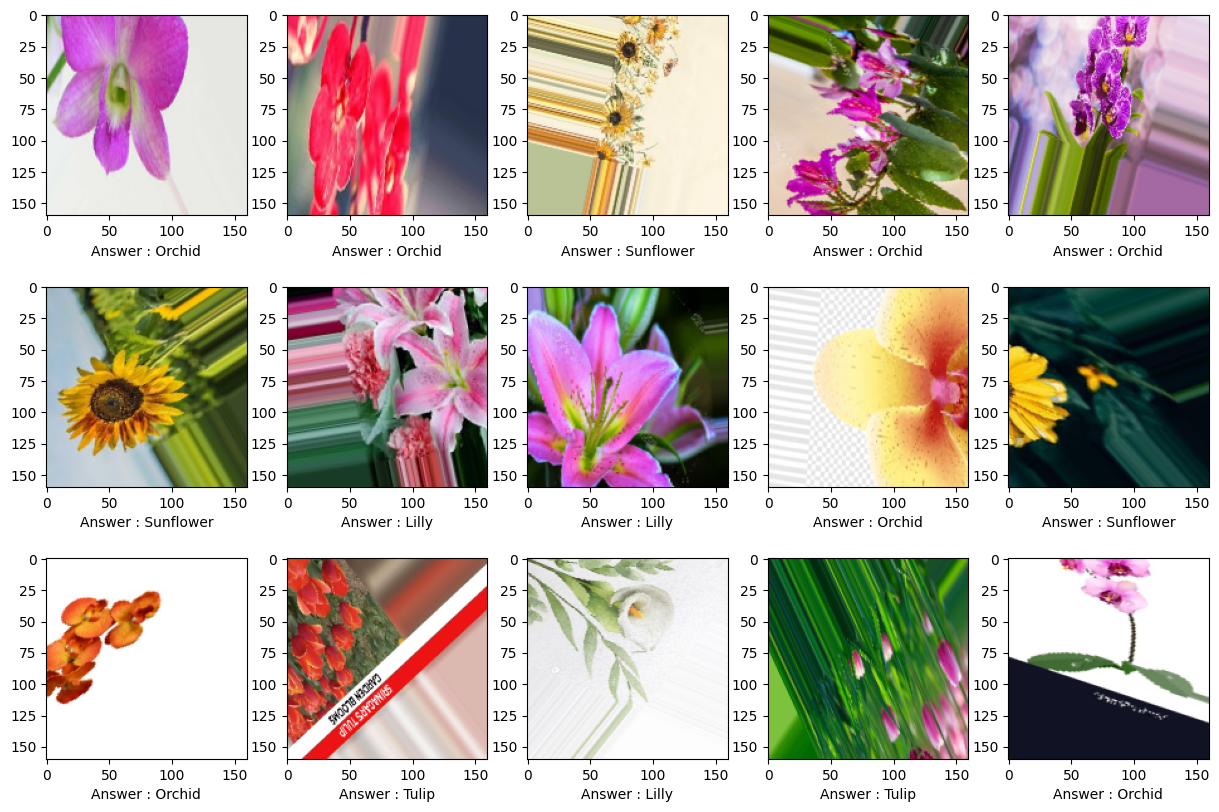

In [5]:
# train 이미지 확인
labels_dict = {0:'Lilly', 1:'Lotus', 2:'Orchid', 3:'Sunflower', 4:'Tulip'}

batch = next(train_gen)

print(batch)
print()

images, labels = batch

print(len(images))
print()
print(len(labels))
print()
print(labels)  # ImageDataGenerator로 전처리 하면 자동으로 원-핫 인코딩으로 준비 됨.
# 따라서 신경망 모델 컴파일 시 loss = 'categorical_crossentropy'로 해야 함.


# train data idx 번째 이미지를 시각화
plt.figure(figsize=(15,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i])
    plt.xlabel(f"Answer : {labels_dict[np.argmax(labels[i])]}")
    #plt.title(f"Label: {labels[0]}")
plt.show()


In [6]:
# 신경망 모델 구성
model = keras.Sequential()

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same', input_shape=(160, 160, 3)))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(80, 80, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(40, 40, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(20, 20, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(10, 10, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(5, 5, 128)

model.add(keras.layers.Flatten())   # 밀집층에 입력시키기 위해 3차원을 1차원으로 변환.

model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.
 
model.add(keras.layers.Dense(5, activation='softmax'))

# 신경망 모델 구조
model.summary()
 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 80, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 40, 40, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

In [7]:
# 신경망 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('T3_N11-2_size160_conv5-128_den2-200_epo200_val15.h5', save_best_only=True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [8]:
# 신경망 모델 훈련
history = model.fit(train_gen, epochs=300, validation_data=val_gen, verbose=1, callbacks=[checkpoint_cb])


Epoch 1/300
120/120 [==============================] - ETA: 0s - loss: 1.4383 - accuracy: 0.3506

c:\Users\AISW-203-104\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/120 [==============================] - 211s 2s/step - loss: 1.4383 - accuracy: 0.3506 - val_loss: 1.2914 - val_accuracy: 0.4074
Epoch 2/300
120/120 [==============================] - 186s 2s/step - loss: 1.2552 - accuracy: 0.4784 - val_loss: 1.1288 - val_accuracy: 0.5126
Epoch 3/300
120/120 [==============================] - 186s 2s/step - loss: 1.1744 - accuracy: 0.5224 - val_loss: 1.0676 - val_accuracy: 0.5570
Epoch 4/300
120/120 [==============================] - 184s 2s/step - loss: 1.1718 - accuracy: 0.5237 - val_loss: 1.1060 - val_accuracy: 0.5630
Epoch 5/300
120/120 [==============================] - 184s 2s/step - loss: 1.1406 - accuracy: 0.5396 - val_loss: 1.0753 - val_accuracy: 0.5822
Epoch 6/300
120/120 [==============================] - 185s 2s/step - loss: 1.1169 - accuracy: 0.5600 - val_loss: 1.1718 - val_accuracy: 0.5363
Epoch 7/300
120/120 [==============================] - 184s 2s/step - loss: 1.0897 - accuracy: 0.5660 - val_loss: 1.0670 - val_accuracy: 0.5733
Epoc

KeyboardInterrupt: 

In [ ]:
# history의 key값 알아보기
print(history.history.keys())


In [ ]:
# 훈련 과정 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# test 평가
model.evaluate(test_gen)

In [ ]:
# test 평가 시각화
test_images, test_labels = next(test_gen)  

print(test_labels)
print(test_labels[0])
print(len(test_labels))

pred = model.predict(test_images)

print(pred)
print(pred[0])
print(len(pred))

plt.figure(figsize=(15, 10))
for i in range(15):  
    plt.subplot(3, 5, i+1)
    plt.imshow(test_images[i])
    true_label = labels_dict[np.argmax(test_labels[i])]  
    predicted_label = labels_dict[np.argmax(pred[i])]  
    plt.xlabel(f'True : {true_label}\nPredicted : {predicted_label}')

plt.show()